In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt

# Perceptrón

## 1. Introduction

Neural Networks are computational models whose objective is to replicate information processing methods analogous to those found in neurons in the brain.

A neural network is a collection of interconnected neurons that learn incrementally from their enviroment, that is, the supplied data, to capture linear and non-linear trends in complex data, so that it provides predictions for new situations.

From a computational point of view, the brain is composed of information-processing elements called neurons. Neurons are made up of three essential elements:

1. The dendrites whose function is to receive the electrical pulses emitted by other neurons. 
2. The body of the neuron, where the nucleus is located, which receives the pulses and transforms them.
3. Once the pulses are processed, they are delivered to other neurons through the axon.

<center>
    <img src="Images/Neurona_tagged.png" width="600">

**Fig. 1:** Principal Component of a Neuron.
</center>

The Perceptron is one of the simples ANN architectures proposed by Frank Rosenblatt in 1957. The Perceptron training algorithm proposed by Rosenblatt was inspired by Hebb's rule. Donal Hebb suggested that when a biological neuron often triggers another neuron, the connection between these two neurons grows stronger. This idea was later summarized by Siegrid Löwel: "Cells that fire together, wire together". This rule later became known as Hebb's rule; that is the connection wegith between two neurons is increased whenever they have the same output [1].

Perceptrons are trained using a variant of this rule that considers the error made by the network. The Perceptron is fed one training instance at a time, and for each instance it makes its prediction. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the input that would have contributed to the correct prediction [1].

## 2. Logic Gates

An introductory exercise to neural networks consists of selecting the appropriate weight factors for the creation of logic gates. Figure 2 includes the schema for the perceptron as a logic gate discussed in class.

<center>
    <img src="Images/NeuralNetwork.png" width="600">

**Fig. 2:** Perceptron as Logic Gate.
</center>

### **OR** Gate

The table used to represent the boolean expression of a logic gate is known as Truth Table. The corresponding truth table for the **OR** gate is:  



| $x_1$ | $x_2$   | y |
| --- |---| ---:|
| 0  | 0  | 0  |
| 0  | 1  | 1  |
| 1  | 0  | 1  |
| 1  | 1  | 1  |

<center>
    Table 1. Truth Table of the **OR** Gate
</center>

The following code was retrieved from [2].  The four instances ($x_1$, $x_2$) are stored as tuples in `test_inputs` and the corresponding output are in `test_outputs`. Observe that `weight1` corresponds to the weight of $x_1$, `weight2`to the weight of $x_2$ and `bias` to the bias.

In [2]:
bias = -1
weight1 = 1
weight2 = 1

# Input and Outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
test_outputs = [0, 1, 1, 1]
outputs = []

for test_input, test_output in zip(test_inputs, test_outputs):
    # Linear Combination
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    
    # Activation Function (Step Function)
    output = int(linear_combination >= 0)
    
    # Save if the prediction is correct ('Yes') or not ('No')
    is_correct_string = 'Yes' if output == test_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    
output_frame = pd.DataFrame(outputs, columns=['X1', 'X2', 'Linear Combination', 'Activation Output', 'Correct?'])

print(output_frame.to_string(index=False))

 X1  X2  Linear Combination  Activation Output Correct?
  0   0                  -1                  0      Yes
  0   1                   0                  1      Yes
  1   0                   0                  1      Yes
  1   1                   1                  1      Yes


**T1.** Which are the correct values of `weight1`,`weight2` anb `bias` such that the perceptron acts as the logical gate **OR**? Justify your answer by using the concepts: *discriminant function* and *decision boundary*. You can add and schema if you need it.


The correct values of `weight1`,`weight2` and `bias` are **1**, **1** and **-1** as you can see in the output frame above, thus having a `discriminant function` `g(x1,x2) = x1 + x2 - 1`.  

This has a graphic justification were the correct outputs can be linearly separable. Here, we can see a `decision boundary` line located at `x1 + x2 -1 = 0`, were all the values over and above the line have **1** as output, and the values below this function have **0**, therefore we can use the discriminant function stated below for the `activation function` as `x1 + x2 - 1 >= 0` (1 for over and above the function, 0 otherwise) thus corresponding the same output values for **OR** Gate.

![picture](https://drive.google.com/uc?export=view&id=1E0LCopcqlpzsglTkJd8eM9yQToGvCU1P)



### Compuerta **AND**

The corresponding truth table for the **AND** gate is: 


| $x_1$ | $x_2$   | y |
| ------ |---------| ------:|
| 0  | 0  | 0  |
| 0  | 1  | 0  |
| 1  | 0  | 0  |
| 1  | 1  | 1  |

<center>
    Table 2. Truth Table of the **AND**.
</center>

**T2.** Which are the correct values of `weight1`,`weight2` anb `bias` such that the perceptron acts as the logical gate **AND**? Justify your answer by using the concepts: *discriminant function* and *decision boundary*. You can add and schema if you need it. 

Note that you need to write the inputs/outputs for the gate **AND**.

In [3]:
weight1 = 1
weight2 = 1
bias = -2

# Input and Outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
test_outputs = [0, 0, 0, 1]
outputs = []

for test_input, test_output in zip(test_inputs, test_outputs):
    # Linear Combination
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    
    # Activation Function (Step Function)
    output = int(linear_combination >= 0)
    
    # Save if the prediction is correct ('Yes') or not ('No')
    is_correct_string = 'Yes' if output == test_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    
output_frame = pd.DataFrame(outputs, columns=['X1', 'X2', 'Linear Combination', 'Activation Output', 'Correct?'])

print(output_frame.to_string(index=False))

 X1  X2  Linear Combination  Activation Output Correct?
  0   0                  -2                  0      Yes
  0   1                  -1                  0      Yes
  1   0                  -1                  0      Yes
  1   1                   0                  1      Yes


The correct values of `weight1`,`weight2` and `bias` are **1**, **1** and **-2** as you can see in the output frame above, thus having a `discriminant function` `g(x1,x2) = x1 + x2 - 2`.  

This has a graphic justification were the correct outputs can be linearly separable. Here, we can see a `decision boundary` line located at `x1 + x2 -2 = 0`, were all the values over and above the line have **1** as output, and the values below this function have **0**, therefore we can use the discriminant function stated below for the `activation function` as `x1 + x2 - 2 >= 0` (1 for over and above the function, 0 otherwise) thus corresponding the same output values for **AND** Gate.

![picture](https://drive.google.com/uc?export=view&id=1QBHtMIznRaEvWbE830tfWjTpu9B0gXcz)

### Compuerta **NOT**

The corresponding truth table for the **NOT** gate is: 




| $x_1$ | $y$   |
| ------ | ------:|
| 0  | 1  |
| 1  | 0  |

<center>
    Table 3. Truth Table of the **NOT**.
</center>


**T3.** Which are the correct values of `weight1` anb `bias` such that the perceptron acts as the logical gate **NOT**? Justify your answer by using the concepts: *discriminant function* and *decision boundary*. You can add and schema if you need it. 

The following code is the same as in the previous tasks. Adapt the code in order to create a Perceptron which acts as the logical gate **NOT**.

In [4]:
weight1 = 1
bias = - 0.5

# Input and Outputs
test_inputs = [0,1]
test_outputs = [1,0]
outputs = []

for test_input, test_output in zip(test_inputs, test_outputs):
    # Linear Combination
    linear_combination = weight1 * test_input + bias
    
    # Activation Function (Step Function)
    output = int(linear_combination <= 0)
    
    # Save if the prediction is correct ('Yes') or not ('No')
    is_correct_string = 'Yes' if output == test_output else 'No'
    outputs.append([test_input, linear_combination, output, is_correct_string])
    
output_frame = pd.DataFrame(outputs, columns=['X1', 'Linear Combination', 'Activation Output', 'Correct?'])

print(output_frame.to_string(index=False))

 X1  Linear Combination  Activation Output Correct?
  0                -0.5                  1      Yes
  1                 0.5                  0      Yes


The values of `weight1` and `bias` are **1** and **-0.5** as you can see in the output frame above, thus having a `discriminant function` `g(x1) = x1 - 0.5`. 

This has a graphic justification were the correct outputs can be linearly separable. Here, we can choose a `decision boundary` line located at `x1 -0 .5 = 0`, were all the values over and left to the line have **1** as output, and the values right this function have **0**, therefore we can use the discriminant function stated below for the `activation function` like this one `x1 - 0.5 <= 0` (1 for left and over the function, 0 otherwise) thus corresponding the same output values for **NOT** Gate.

![picture](https://drive.google.com/uc?export=view&id=1WPuz4jZlMt2zb4MkxLWx2IxB92pqdvfF)

### Compuerta **XOR**

The corresponding truth table for the **XOR** gate is: 


| $x_1$ | $x_2$   | y |
| ------ |---------| ------:|
| 0  | 0  | 0  |
| 0  | 1  | 1  |
| 1  | 0  | 1  |
| 1  | 1  | 0  |

<center>
    Table 3. Truth Table of the **XOR**.
</center>




**T4.** Which are the correct values of `weight1`, `weight2` anb `bias` such that the perceptron acts as the logical gate **XOR**? Justify your answer by using the concepts: *discriminant function* and *decision boundary*. You can add and schema if you need it. 

The following code is the same as in the previous tasks. Adapt the code in order to create a Perceptron which acts as the logical gate **XOR**.

In the case of the **XOR** gate, there is not a linear combination that fullfills the whole outputs correctly as the points are crossed. We would need to use a more complex discriminant function using **AND, OR and NOT** gates. --> https://www.geeksforgeeks.org/implementation-of-perceptron-algorithm-for-xor-logic-gate-with-2-bit-binary-input/ 

![picture](https://drive.google.com/uc?export=view&id=1xznYgP64f-Wgz6nVyzns4uGxID1w5Udm)

![picture](https://drive.google.com/uc?export=view&id=1XeSEu0_6C7gWoInSXe61REtdqlWlaC0I)

In [5]:
# Based on: https://www.geeksforgeeks.org/implementation-of-perceptron-algorithm-for-xor-logic-gate-with-2-bit-binary-input/

# define Unit Step Function 
def unitStep(y): 
    if y >= 0: 
        return 1
    else: 
        return 0
  
# design Perceptron Model 
def perceptronModel(x, w, b): 
    v = np.dot(w, x) + b 
    y = unitStep(v) 
    return y 
  
# NOT Logic Function 
# w = -1, b = 0.5 
def NOT_logicFunction(x): 
    wNOT = -1
    bNOT = 0.5
    return perceptronModel(x, wNOT, bNOT) 
  
# AND Logic Function 
# w1 = 1, w2 = 1, b = -2
def AND_logicFunction(x): 
    w = np.array([1, 1]) 
    bAND = -1.5
    return perceptronModel(x, w, bAND) 
  
# OR Logic Function 
# w1 = 1, w2 = 1, b = -1
def OR_logicFunction(x): 
    w = np.array([1, 1]) 
    bOR = -0.5
    return perceptronModel(x, w, bOR) 
  
# XOR Logic Function 
# with AND, OR and NOT   
# function calls in sequence 
def XOR_logicFunction(x): 
    y1 = AND_logicFunction(x) 
    y2 = OR_logicFunction(x) 
    y3 = NOT_logicFunction(y1) 
    final_x = np.array([y2, y3]) 
    finalOutput = AND_logicFunction(final_x) 
    return finalOutput  

# Input and Outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
test_outputs = [0, 1, 1, 0]
outputs = []

for test_input, test_output in zip(test_inputs, test_outputs):

    # Linear Combination
    y1 = AND_logicFunction(np.array((test_input[0],test_input[1]))) 
    y2 = OR_logicFunction(np.array((test_input[0],test_input[1]))) 
    y3 = NOT_logicFunction(y1) 
    final_x = np.array([y2, y3]) 
    
    # Activation Function (Step Function)
    output = AND_logicFunction(final_x) 
    
    # Save if the prediction is correct ('Yes') or not ('No')
    is_correct_string = 'Yes' if output == test_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    
output_frame = pd.DataFrame(outputs, columns=['X1', 'X2', 'Linear Combination', 'Activation Output', 'Correct?'])

print(output_frame.to_string(index=False))

 X1  X2  Linear Combination  Activation Output Correct?
  0   0                 0.5                  0      Yes
  0   1                 0.5                  1      Yes
  1   0                 0.5                  1      Yes
  1   1                 0.5                  0      Yes


## 3. Perceptron Model

The implementation of the Perceptron of this activity will be done by using an Object Oriented Programming style. Consider the following class.

In [6]:
class perceptron:
    
    """
    <Percepton classification model>
    """
    
    def __init__(self, n_inputs, max_iterations=50, learning_rate=0.01):
        """
        <Initialize perceptron class with the following parameters and attributes>
        
        Input:
        <n_inputs: how many weights we need to learn.>
        <max_iterations: max. number of iterations before stop>
        <learning_rate: size of the learning rate for each step>
        
        Output:
        <nothing>
        """
        self.max_iterations = max_iterations
        self.n_inputs = n_inputs 

        self.weights = np.zeros((n_inputs, 1))
        self.bias = 0
        self.learning_rate = learning_rate

        
    def prediction(self, inputs):
        """
        <Compute the value of discriminant function, then uses activation function for each row during iteration>
        
        Input:
        <inputs: input vector data row>
        
        Output:
        <activation: predicted label>
        """
        # Compute discriminant function value
        #print(inputs.shape, self.weights.shape)
        g = np.dot(inputs, self.weights) + self.bias
        #print(g)
        #print(g.shape)
        
        # Compute activation function
        activation = 1 if g >= 0 else 0
        
        return activation

    def predict(self, Xtest):
        """
        <Compute the predicted labels for a given test data>

        Input:
        <inputs: input vector data array>
        
        Output:
        <activation: predicted labels array>
        """
        predicted_values=np.zeros((Xtest.shape[0], 1))

        for i, Xrow in enumerate(Xtest):
          y_hat = self.prediction(Xrow)
          predicted_values[i] = y_hat
        
        return predicted_values
    
    def fit(self, train_inputs, train_labels):
        from sklearn.metrics import accuracy_score
        """
        <Apply The Perceptron Algorithm in order to obtain the best values for the weight vector and bias>
        
        Input:
        <train_inputs: train input set to be predicted>
        <train_labels: true prediction label set>
        
        Output:
        <Best values for self.weight vector and self.bias>
        """
        self.error_rate_list = []

        for epoch in range(self.max_iterations):
          for input, label in zip(train_inputs, train_labels):
            y_hat = self.prediction(input) 
            #print(y_hat)
            self.weights += self.learning_rate*(label - y_hat)*input.reshape(-1,1)
            self.bias += self.learning_rate*(label - y_hat)  
          #print('current epoch: ', epoch)
          #print('current weights: ', self.weights)
          #print('missing items: ',)
          self.error_rate_list.append(1-accuracy_score(np.array(train_labels), np.array(self.predict(train_inputs)))) # Compute error rate per epoch

In [7]:
#np.dot([-0.5, 0.5], model.weights) + model.bias

**T5.** Complete the function `__init__(self, n_inputs, max_iterations=200, learning_rate=0.01`. It should be initialized `self.weight` as a vector with zero values and `self.bias` to zero.

**T6.** Complete the function `Perceptron.fit(self, train_inputs, train_labels)`. The function should inputs `train_inputs` and `train_labels`. The function should apply *The Perceptron Algorithm* in order to obtain the best values for the weight vector and bias. Observe that the class has the following attributes `max_iterations` and `learning_rate`. After each epoch (iteration) print the current *epoch*, *learning_rate* and *missing* items.

**T7.** Complete the function `Perceptron.predict(self, inputs)` which should return the predicted values for all instances in `inputs`.

You can create "private" methods and attributes.

**T8.** In the following sections **A. Perceptron OR**, **A. Perceptron OR**, **A. Perceptron OR**, **A. Perceptron OR** train a perceptron model in order to acts as the corresponding logical gate. Do you need 200 iterations? Modify the `max_iterations`if you need it.

In each case print the corresponding *weights* and *bias.

### A. Perceptron OR

In [8]:
# Create the perceptron model for the gate OR.
perceptron_or = perceptron(n_inputs=2)

In [9]:
# Input and Outputs
test_inputs_or = [(0, 0), (0, 1), (1, 0), (1, 1)]
test_inputs_or = np.array(test_inputs_or)

test_outputs_or = np.array([0, 1, 1, 1])

In [10]:
# Training
perceptron_or.fit(test_inputs_or, test_outputs_or)

In [11]:
# Predict
print('(0,0): ',perceptron_or.prediction([0,0]))
print('(0,1): ',perceptron_or.prediction([0,1]))
print('(1,0): ',perceptron_or.prediction([1,0]))
print('(1,1): ',perceptron_or.prediction([1,1]))

(0,0):  0
(0,1):  1
(1,0):  1
(1,1):  1


In [12]:
# Print the weights and bias
print('weights: ', perceptron_or.weights)
print('bias: ', perceptron_or.bias)

weights:  [[0.01]
 [0.01]]
bias:  -0.01


### B. Perceptron AND

In [13]:
# Create the perceptron model for the gate OR.
perceptron_and = perceptron(n_inputs=2)

In [14]:
# Input and Outputs
test_inputs_and = [(0, 0), (0, 1), (1, 0), (1, 1)]
test_inputs_and = np.array(test_inputs_and)

test_outputs_and = np.array([0, 0, 0, 1])

In [15]:
# Training
perceptron_and.fit(test_inputs_and, test_outputs_and)

In [16]:
# Predict
print('(0,0): ',perceptron_and.prediction([0,0]))
print('(0,1): ',perceptron_and.prediction([0,1]))
print('(1,0): ',perceptron_and.prediction([1,0]))
print('(1,1): ',perceptron_and.prediction([1,1]))

(0,0):  0
(0,1):  0
(1,0):  0
(1,1):  1


In [17]:
# Print the weights and bias
print('weights: ', perceptron_and.weights)
print('bias: ', perceptron_and.bias)

weights:  [[0.02]
 [0.01]]
bias:  -0.03


### C. Perceptron NOT

In [18]:
# Create the perceptron model for the gate OR.
perceptron_not = perceptron(n_inputs=1)

In [19]:
# Input and Outputs
test_inputs_not = [0, 1]
test_inputs_not = np.array(test_inputs_not)

test_outputs_not = np.array([1,0])

In [20]:
# Training
perceptron_not.fit(test_inputs_not, test_outputs_not)

In [21]:
# Predict
print('(0): ',perceptron_not.prediction([0]))
print('(1): ',perceptron_not.prediction([1]))
print('(-1): ',perceptron_not.prediction([-1]))
print('(2): ',perceptron_not.prediction([2]))

(0):  1
(1):  0
(-1):  1
(2):  0


In [22]:
# Print the weights and bias
print('weights: ', perceptron_not.weights)
print('bias: ', perceptron_not.bias)

weights:  [[-0.01]]
bias:  0.0


### D. Perceptron XOR

In [23]:
# Create the perceptron model for the gate OR.
perceptron_xor = perceptron(n_inputs=2)

In [24]:
# Input and Outputs
test_inputs_xor = [(0, 0), (0, 1), (1, 0), (1, 1)]
test_inputs_xor = np.array(test_inputs_xor)

test_outputs_xor = np.array([0, 1, 1, 0])

In [25]:
# Training
perceptron_xor.fit(test_inputs_xor, test_outputs_xor)

In [26]:
# Predict
print('(0,0): ',perceptron_xor.prediction([0,0]))
print('(0,1): ',perceptron_xor.prediction([0,1]))
print('(1,0): ',perceptron_xor.prediction([1,0]))
print('(1,1): ',perceptron_xor.prediction([1,1]))

(0,0):  1
(0,1):  1
(1,0):  0
(1,1):  0


In [27]:
# Print the weights and bias
print('weights: ', perceptron_xor.weights)
print('bias: ', perceptron_xor.bias)

weights:  [[-0.01]
 [ 0.  ]]
bias:  0.0


## 4. Classification

The Iris Dataset is one of the most known in the literature. You already worked with this dataset in NB3.1 K Nearest Neighbors. The common goal of this dataset is to predict the type of plant based on the features. One of the classes is linearly separable but the rest are not [[3](https://archive.ics.uci.edu/ml/datasets/iris)].

In [28]:
iris = datasets.load_iris()
irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)
irisDF["target"] = iris.target

In [29]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Observe that the target variable corrrespond to 0 for setosa, 1 for versicolor and 2 for virginica.

**T9.** Complete the following preprocessing steps:
* Select the columns `petal length (cm)` and `petal width (cm)`.
* Standardize the input variables.

In [30]:
from sklearn.preprocessing import StandardScaler

# Select Columns
irisDF_selected = irisDF[['petal length (cm)', 'petal width (cm)']]

# fit the scaler 
scaler = StandardScaler()
scaler.fit(irisDF_selected)
std_iris = scaler.transform(irisDF_selected)
std_iris_df = pd.DataFrame(std_iris, columns = ['petal length (cm)', 'petal width (cm)'])
std_iris_df['target'] = irisDF['target']
std_iris_df.head()

,petal length (cm),petal width (cm),target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


**T10.** Make a scatter plot of `petal width (cm)` (y-axis) vs `petal length (cm)` (x-axis). The data points must be colored according to the target variable.

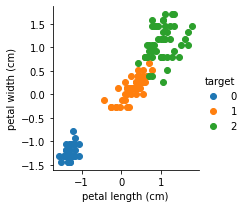

In [31]:
import seaborn as sns

g = sns.FacetGrid(std_iris_df, hue='target')
g = g.map(plt.scatter, "petal length (cm)", "petal width (cm)")
g = g.add_legend()
plt.show()

## A. Linearly Separable Case

Consider that you want to create a model to classify leaves into setosa and not-setosa. As you can observe in **T10.**, those classes are linearly separable.

**T11.** Train a Perceptron which classify each instante into setosa (1) and not-setosa (0). In order to fulfill this tasks, consider the following:
* Modify the *target* column such that it contains a 1 if the leaf correspond to a setosa plant or 0 if does not correspond to a setosa plat (virginica or versicolor).
* Split the dataset into train and test sets. Do not forget make it in a stratified way!
* Create and fit a Perceptron Model to the Train Test.
* Evaluate the Model with the test set. Present the Confusion Matrix and Accuracy of the Model. 

In [32]:
# Modification of target column
bin_iris_df = std_iris_df

binarization = lambda x: 1 if x == 0 else 0

bin_iris_df['target'] = bin_iris_df['target'].apply(binarization)

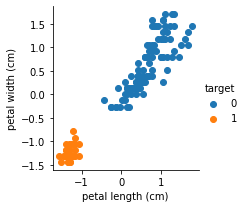

In [33]:
# Original Label Data
g = sns.FacetGrid(bin_iris_df, hue='target')
g = g.map(plt.scatter, "petal length (cm)", "petal width (cm)")
g = g.add_legend()

plt.show()

In [34]:
# Stratified Data Split
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(bin_iris_df[['petal length (cm)', 'petal width (cm)']], 
                                                                    bin_iris_df['target'].to_numpy(), 
                                                                    test_size=0.3, 
                                                                    stratify=bin_iris_df['target'],
                                                                    random_state=0)

In [35]:
# Perceptron Model
model = perceptron(n_inputs=2, learning_rate=0.01)
model.fit(np.array(data_train), np.array(target_train))
predicted_values = model.predict(np.array(data_test))

In [36]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, predicted_values)  

array([[30,  0],
       [ 0, 15]])

In [37]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(target_test, predicted_values) 

1.0

In [38]:
# Weights and bias
print('weights: ', model.weights)
print('bias: ', model.bias)

weights:  [[-0.01728995]
 [-0.01317199]]
bias:  -0.01


**T12.** Learning Curves are commonly used to validate the performance of Machine Learning Models. In this context, [2] is an interesting reference that you can read. Make a curve of the **Error Rate** (1 - Accuracy) per epoch. Modify the class in case you need it.

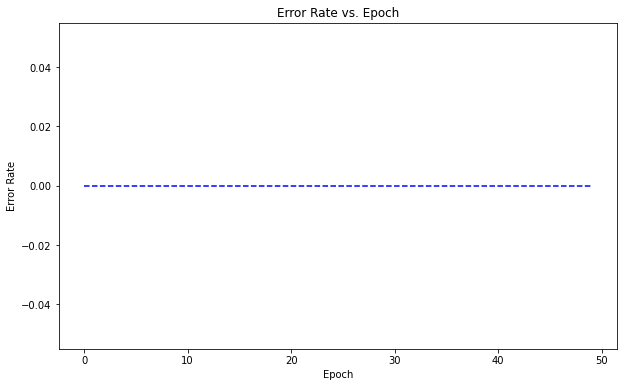

In [39]:
# Error Rate of Test Data over epoch
error_rate_list = model.error_rate_list
plt.figure(figsize=(10,6))
plt.plot(error_rate_list,color = 'blue',linestyle='dashed')
plt.title('Error Rate vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.show()

**T13.** Make a scatter plot of petal width (cm) (y-axis) vs petal length (cm) (x-axis). The data points must be colored according to the target variable (setosa, no-setosa). Also, include the *decision boundary*.

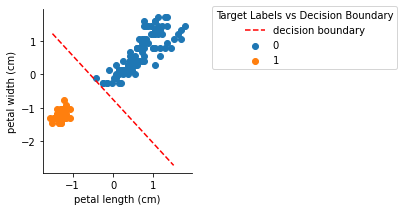

In [40]:
# Real Label Points vs Predicted Data
g = sns.FacetGrid(bin_iris_df, hue='target')
g = g.map(plt.scatter, "petal length (cm)", "petal width (cm)")
#g = g.add_legend()

# decision boundary
x = np.linspace(-1.5,1.5,100)
y = (-model.weights[0]*x -model.bias) / model.weights[1]
plt.plot(x, y, 'r--', label= 'decision boundary')
plt.legend(bbox_to_anchor=(1.1, 1.05), title='Target Labels vs Decision Boundary')


plt.show()

## B. Non Linearly Separable Case

Consider that you want to create a model to classify leaves into virginica and no-virginica. As you can observe in **T10.**, those classes are not linearly separable.

**T14.** Train a Perceptron which classify each instante into virginica (1) and no-virginica (0). In order to fulfill this tasks, consider the following:
* Modify the *target* column such that it contains a 1 if the leaf correspond to a virginica plant or 0 if does not correspond to a virginica plant (setosa or versicolor).
* Split the dataset into train and test sets. Do not forget make it in a stratified way!
* Create and fit a Perceptron Model to the Train Test.
* Evaluate the Model with the test set. Present the Confusion Matrix and Accuracy of the Model. 

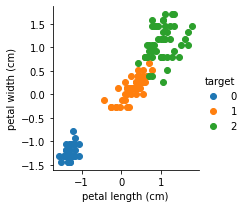

In [41]:
# Original Labeled Data
std_iris_df = pd.DataFrame(std_iris, columns = ['petal length (cm)', 'petal width (cm)'])
std_iris_df['target'] = irisDF['target']

g = sns.FacetGrid(std_iris_df, hue='target')
g = g.map(plt.scatter, "petal length (cm)", "petal width (cm)")
g = g.add_legend()
plt.show()

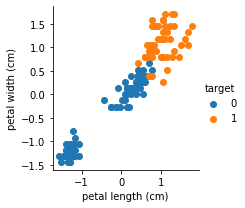

In [42]:
# Modification of target column
bin_iris_df = std_iris_df

binarization = lambda x: 1 if x == 2 else 0

bin_iris_df['target'] = bin_iris_df['target'].apply(binarization)

g = sns.FacetGrid(bin_iris_df, hue='target')
g = g.map(plt.scatter, "petal length (cm)", "petal width (cm)")
g = g.add_legend()

plt.show()

In [43]:
# Stratified Data Split
data_train, data_test, target_train, target_test = train_test_split(bin_iris_df[['petal length (cm)', 'petal width (cm)']], 
                                                                    bin_iris_df['target'].to_numpy(), 
                                                                    test_size=0.3, 
                                                                    stratify=bin_iris_df['target'],
                                                                    random_state=0)

In [44]:
# Perceptron Model
model = perceptron(n_inputs=2, learning_rate=0.1)
model.fit(np.array(data_train), np.array(target_train))
predicted_values = model.predict(np.array(data_test))

In [45]:
# Confussion Matrix
confusion_matrix(target_test, predicted_values)  

array([[27,  3],
       [ 0, 15]])

In [46]:
# Accuracy
accuracy_score(target_test, predicted_values) 

0.9333333333333333

In [47]:
# Weights and bias
print('weights: ', model.weights)
print('bias: ', model.bias)

weights:  [[0.36557833]
 [0.38138232]]
bias:  -0.4


**T15.** Make a curve of the **Error Rate** (1 - Accuracy) per epoch. Modify the class in case you need it. What do you expect in this case? What can you observe in this case?

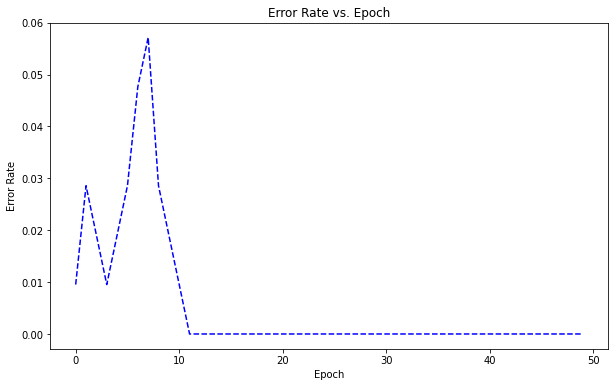

In [48]:
# test data erorr rate over epoch
error_rate_list = model.error_rate_list
plt.figure(figsize=(10,6))
plt.plot(error_rate_list,color = 'blue',linestyle='dashed')
plt.title('Error Rate vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.show()

**T16.** Make a scatter plot of petal width (cm) (y-axis) vs petal length (cm) (x-axis). The data points must be colored according to the target variable (setosa, no-setosa). Also, include the *decision boundary*.

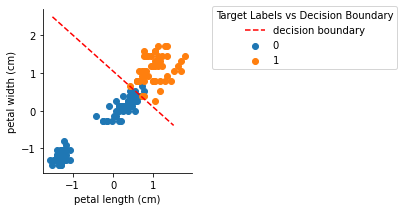

In [49]:
# Real Label vs Predicted 
g = sns.FacetGrid(bin_iris_df, hue='target')
g = g.map(plt.scatter, "petal length (cm)", "petal width (cm)")
#g = g.add_legend()

# decision boundary
x = np.linspace(-1.5,1.5,100)
y = (-model.weights[0]*x -model.bias) / model.weights[1]
plt.plot(x, y, 'r--', label= 'decision boundary')
plt.legend(bbox_to_anchor=(1.1, 1.05), title='Target Labels vs Decision Boundary')


plt.show()

## C. Perceptron (Scikit-Learn)

Scikit-Learn implements a Perceptron Classifier in `sklearn.linear_model.Perceptron`.

**T17.** Complete tasks **T11**, **T12** and **T13** but using the Perceptron Model implemented in scikit-learn.

In [50]:
std_iris_df = pd.DataFrame(std_iris, columns = ['petal length (cm)', 'petal width (cm)'])
std_iris_df['target'] = irisDF['target']

bin_iris_df = std_iris_df

binarization = lambda x: 1 if x == 0 else 0 # Setosa (1) Non-setosa (0)

bin_iris_df['target'] = bin_iris_df['target'].apply(binarization)

# Data Split

data_train, data_test, target_train, target_test = train_test_split(bin_iris_df[['petal length (cm)', 'petal width (cm)']], 
                                                                    bin_iris_df['target'].to_numpy(), 
                                                                    test_size=0.3, 
                                                                    stratify=bin_iris_df['target'],
                                                                    random_state=0)

In [51]:
from sklearn.linear_model import Perceptron

# Perceptron Model
model = Perceptron(alpha=0.01, max_iter=50)
model.fit(np.array(data_train), np.array(target_train))
predicted_values = model.predict(np.array(data_test))

In [52]:
# Confussion Matrix
confusion_matrix(target_test, predicted_values) 

array([[30,  0],
       [ 0, 15]])

In [53]:
# Accuracy
accuracy_score(target_test, predicted_values) 

1.0

In [54]:
model.coef_

array([[-0.8195957 , -1.44883158]])

In [55]:
model.intercept_

array([-1.])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

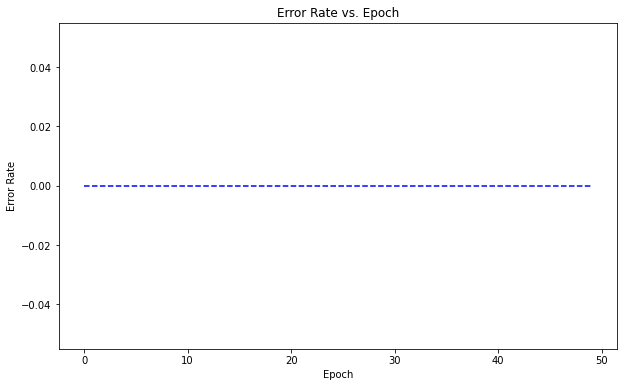

In [56]:
error_rate_list=[]
for i in range(1, model.max_iter+1):
  model = Perceptron(alpha=0.01, max_iter=i)
  model.fit(np.array(data_train), np.array(target_train))
  predicted_values = model.predict(np.array(data_test))
  error_rate_list.append(1-accuracy_score(target_test, predicted_values))

plt.figure(figsize=(10,6))
plt.plot(error_rate_list,color = 'blue',linestyle='dashed')
plt.title('Error Rate vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.show()

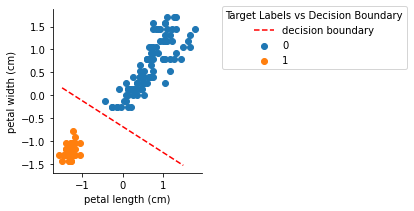

In [57]:
# Real Label vs Predicted 
g = sns.FacetGrid(bin_iris_df, hue='target')
g = g.map(plt.scatter, "petal length (cm)", "petal width (cm)")
#g = g.add_legend()

# decision boundary
x = np.linspace(-1.5,1.5,100)
y = (-model.coef_[0][0]*x -model.intercept_) / model.coef_[0][1]
plt.plot(x, y, 'r--', label= 'decision boundary')
plt.legend(bbox_to_anchor=(1.1, 1.05), title='Target Labels vs Decision Boundary')

plt.show()

**T18.** Complete tasks **T14**, **T15** and **T16** but using the Perceptron Model implemented in scikit-learn.

In [58]:
std_iris_df = pd.DataFrame(std_iris, columns = ['petal length (cm)', 'petal width (cm)'])
std_iris_df['target'] = irisDF['target']

bin_iris_df = std_iris_df

binarization = lambda x: 1 if x == 2 else 0 # Virginica (1) Non-virginica (0)

bin_iris_df['target'] = bin_iris_df['target'].apply(binarization)

data_train, data_test, target_train, target_test = train_test_split(bin_iris_df[['petal length (cm)', 'petal width (cm)']], 
                                                                    bin_iris_df['target'].to_numpy(), 
                                                                    test_size=0.3, 
                                                                    stratify=bin_iris_df['target'],
                                                                    random_state=0)

In [59]:
# Perceptron Model
model = Perceptron(alpha=0.01, max_iter=50)
model.fit(np.array(data_train), np.array(target_train))
predicted_values = model.predict(np.array(data_test))

In [60]:
# Confussion Matrix
confusion_matrix(target_test, predicted_values)

array([[26,  4],
       [ 0, 15]])

In [61]:
# Accuracy
accuracy_score(target_test, predicted_values) 

0.9111111111111111

In [62]:
model.coef_

array([[3.99680786, 3.68219097]])

In [63]:
model.intercept_

array([-4.])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

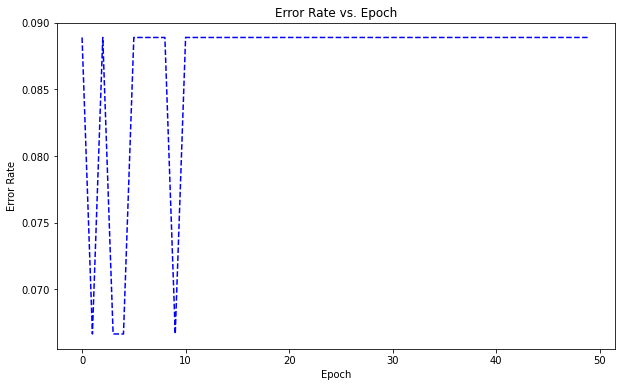

In [64]:
error_rate_list=[]
for i in range(1, model.max_iter+1):
  model = Perceptron(alpha=0.01, max_iter=i)
  model.fit(np.array(data_train), np.array(target_train))
  predicted_values = model.predict(np.array(data_test))
  error_rate_list.append(1-accuracy_score(target_test, predicted_values))

plt.figure(figsize=(10,6))
plt.plot(error_rate_list,color = 'blue',linestyle='dashed')
plt.title('Error Rate vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.show()

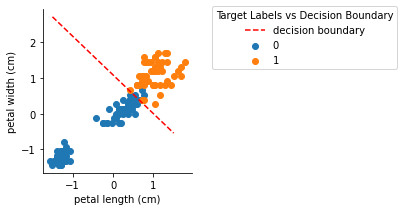

In [65]:
# Real Label vs Predicted 
g = sns.FacetGrid(bin_iris_df, hue='target')
g = g.map(plt.scatter, "petal length (cm)", "petal width (cm)")
#g = g.add_legend()

# decision boundary
x = np.linspace(-1.5,1.5,100)
y = (-model.coef_[0][0]*x -model.intercept_) / model.coef_[0][1]
plt.plot(x, y, 'r--', label= 'decision boundary')
plt.legend(bbox_to_anchor=(1.1, 1.05), title='Target Labels vs Decision Boundary')

plt.show()

## Additional Material

[1] Deep Learning (PyTorch) from Udacity's Repository: https://github.com/udacity/deep-learning-v2-pytorch

[2] How to use Learning Curves to Diagnose Machine Learning Model Performance: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/ 